In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os, sys
import warnings
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
%matplotlib inline

In [116]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/netflix_titles.csv")

In [117]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

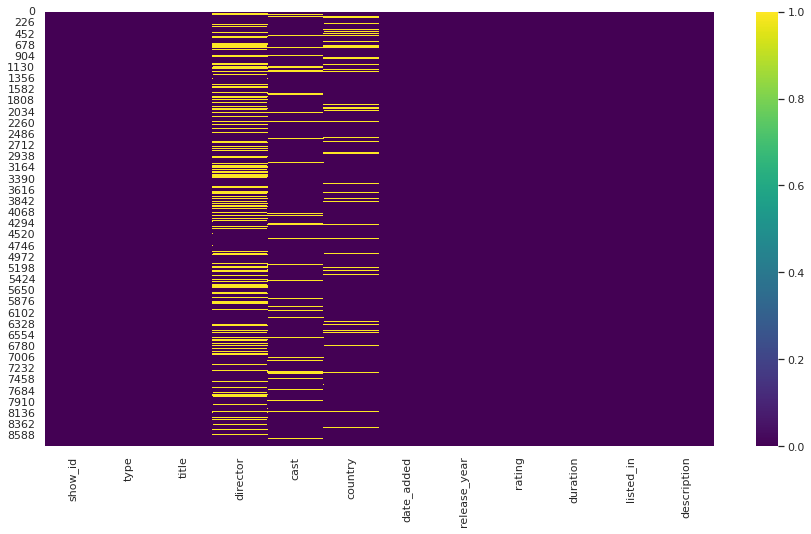

In [118]:
sns.set()
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),cmap = 'viridis')
plt.show()

In [119]:
# Get unique count for each variable
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [120]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [121]:
df = df.dropna( how='any',subset=['cast', 'director'])

In [122]:
df['country'].fillna('Missing',inplace=True)
df['date_added'].fillna('Missing',inplace=True)
df['rating'].fillna('Missing',inplace=True)
df.isnull().sum().sum()
#Replacing null values with ‘missing’

3

In [123]:
disney_movies = df[df.type == 'Movie']
disney_shows = df[df.type == 'TV Show']

In [124]:
#Converting into a proper date-time format and adding two more features year and month.
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [125]:
df = df.rename(columns={"listed_in":"genre"})
df['genre'] = df['genre'].apply(lambda x: x.split(",")[0])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_added,month_added
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Missing,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Missing,2021-09-24,2021,TV-MA,1 Season,TV Dramas,The arrival of a charismatic young priest brin...,2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Missing,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",2021,9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...,2021,9


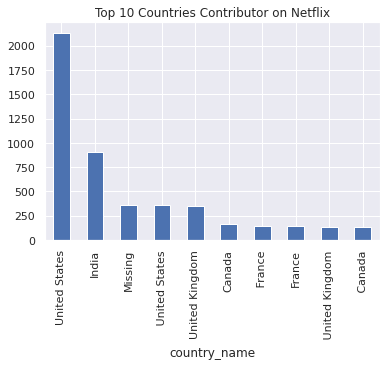

In [126]:
df['id'] = df.index+1
select_country = df.set_index('id').country.str.split(',', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'country_name')
select_country.groupby('country_name').size().sort_values(ascending=False).head(10).plot.bar()
plt.title('Top 10 Countries Contributor on Netflix')
plt.show()

In [127]:
rating_df = df.groupby(['rating','type']).size().sort_values(ascending=False).reset_index()
rating_df.columns =['rating','type','count']
rating_df

,rating,type,count
0,TV-MA,Movie,1842
1,TV-14,Movie,1279
2,R,Movie,788
3,PG-13,Movie,477
4,TV-PG,Movie,441
5,PG,Movie,279
6,TV-Y7,Movie,116
7,TV-Y,Movie,97
8,TV-MA,TV Show,97
9,TV-G,Movie,93


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12539 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 12539 missing from current font.



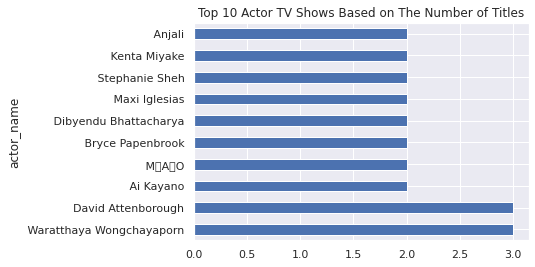

In [128]:
select_actor = df.set_index('type').cast.str.split(',', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'actor_name')
select_actor[select_actor.type=='TV Show'].groupby('actor_name').size().sort_values(ascending=False)[1:11].plot.barh()
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
plt.show()

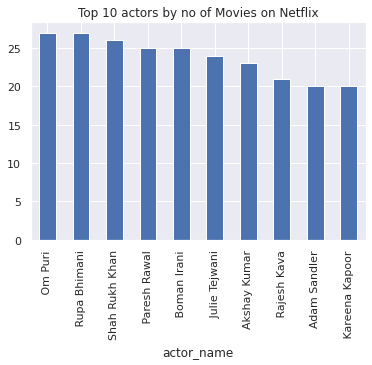

In [129]:
select_actor = df.set_index('id').cast.str.split(',', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'actor_name')
select_actor.groupby('actor_name').size().sort_values(ascending=False)[1:11].plot.bar()
plt.title('Top 10 actors by no of Movies on Netflix')
plt.show()

In [130]:
top = df['country'].value_counts()[0:8]
fig=px.pie(df, values=top, names=top.index, labels=top.index)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

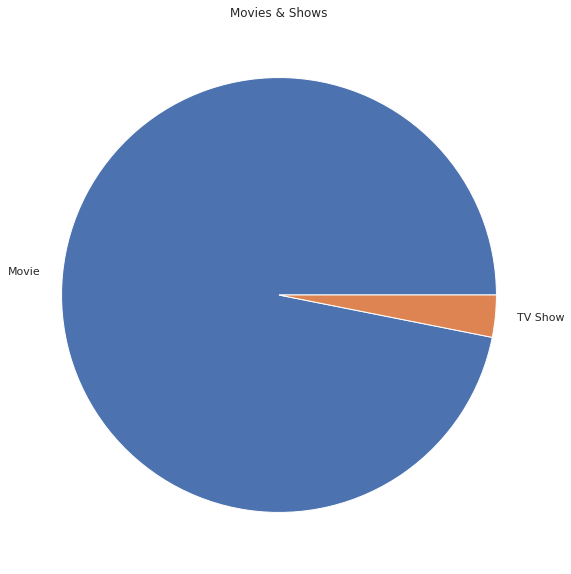

In [131]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.type.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Movies & Shows")
plt.show()

In [132]:
Country = pd.DataFrame(df["country"].value_counts().reset_index().values,columns=["country","TotalShows"])
Country.head()

fig = px.choropleth(   
    locationmode='country names',
    locations=Country.country,
    featureidkey="Country.country",
    labels=Country["TotalShows"]
)
fig.show()